In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train = X_train_full[:50000] / 255
y_train = y_train_full[:50000]

X_val = X_train_full[50000:] / 255
y_val = y_train_full[50000:]

X_test = X_test / 255

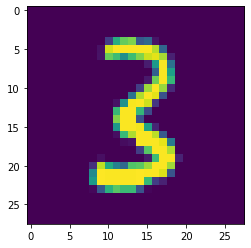

In [5]:
plt.imshow(X_val[0])

In [10]:
tf.random.set_seed(42)
np.random.seed(42)

dropout_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.GaussianNoise(0.1),
    keras.layers.Dense(200, activation = "selu"),
    keras.layers.Dense(100, activation = "selu"),
    keras.layers.Dense(30, activation = "selu")
])

dropout_decoder = keras.models.Sequential([
    keras.layers.Dense(200, activation = "selu", input_shape=[30]),
    keras.layers.Dense(100, activation = "selu"),
    keras.layers.Dense(28*28, activation = "sigmoid"),
    keras.layers.Reshape([28,28])
])

dropout_autoencoder = keras.models.Sequential([dropout_encoder, dropout_decoder])

dropout_autoencoder.compile(loss = "binary_crossentropy",metrics=["mse"], optimizer = keras.optimizers.SGD(learning_rate = 0.5))

In [11]:
dropout_encoder.summary()
dropout_decoder.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 gaussian_noise_1 (GaussianN  (None, 784)              0         
 oise)                                                           
                                                                 
 dense_6 (Dense)             (None, 200)               157000    
                                                                 
 dense_7 (Dense)             (None, 100)               20100     
                                                                 
 dense_8 (Dense)             (None, 30)                3030      
                                                                 
Total params: 180,130
Trainable params: 180,130
Non-trainable params: 0
________________________________________________

In [12]:
earlystop = keras.callbacks.EarlyStopping(monitor= "val_loss", patience = 5)

In [13]:
history = dropout_autoencoder.fit(X_train, X_train, validation_data = (X_val, X_val), epochs = 500, callbacks = [earlystop])

Epoch 1/500
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2209 - mse: 0.0524 - val_loss: 0.1737 - val_mse: 0.0362
Epoch 2/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1594 - mse: 0.0317 - val_loss: 0.1481 - val_mse: 0.0279
Epoch 3/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1432 - mse: 0.0264 - val_loss: 0.1362 - val_mse: 0.0240
Epoch 4/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1332 - mse: 0.0231 - val_loss: 0.1287 - val_mse: 0.0215
Epoch 5/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1274 - mse: 0.0212 - val_loss: 0.1247 - val_mse: 0.0203
Epoch 6/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1241 - mse: 0.0202 - val_loss: 0.1210 - val_mse: 0.0191
Epoch 7/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.1212 - mse: 0.0192 - val_loss: 0.1186 - val_mse: 0.0184
Epoch 8/500
1563/1563 [==============================] 

1563/1563 [==============================] - 6s 4ms/step - loss: 0.0889 - mse: 0.0089 - val_loss: 0.0878 - val_mse: 0.0084
Epoch 62/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0887 - mse: 0.0088 - val_loss: 0.0875 - val_mse: 0.0083
Epoch 63/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0885 - mse: 0.0088 - val_loss: 0.0871 - val_mse: 0.0082
Epoch 64/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0884 - mse: 0.0087 - val_loss: 0.0870 - val_mse: 0.0082
Epoch 65/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0882 - mse: 0.0087 - val_loss: 0.0868 - val_mse: 0.0081
Epoch 66/500
1563/1563 [==============================] - 6s 4ms/step - loss: 0.0880 - mse: 0.0086 - val_loss: 0.0873 - val_mse: 0.0082
Epoch 67/500
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0879 - mse: 0.0086 - val_loss: 0.0872 - val_mse: 0.0082
Epoch 68/500
1563/1563 [==============================] - 6s 

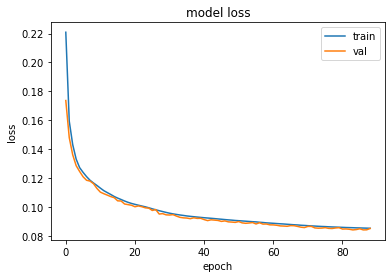

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

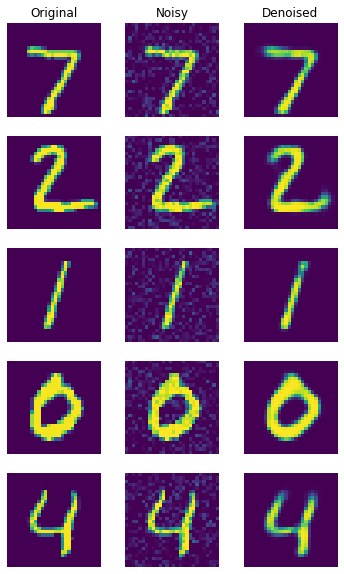

In [15]:
n_images = 5
new_images = X_test[:n_images]
new_images_noisy = new_images + np.random.randn(n_images, 28, 28) * 0.1
new_images_denoised = dropout_autoencoder.predict(new_images_noisy)

plt.figure(figsize=(6, n_images * 2))
for index in range(n_images):
    plt.subplot(n_images, 3, index * 3 + 1)
    plt.imshow(new_images[index])
    plt.axis('off')
    if index == 0:
        plt.title("Original")
    plt.subplot(n_images, 3, index * 3 + 2)
    plt.imshow(np.clip(new_images_noisy[index], 0., 1.))
    plt.axis('off')
    if index == 0:
        plt.title("Noisy")
    plt.subplot(n_images, 3, index * 3 + 3)
    plt.imshow(new_images_denoised[index])
    plt.axis('off')
    if index == 0:
        plt.title("Denoised")
plt.show()